190501V - Ranathunga R.A.C.D.

Question 01

In [10]:
#import the libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

%matplotlib inline

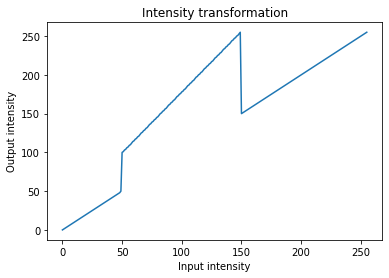

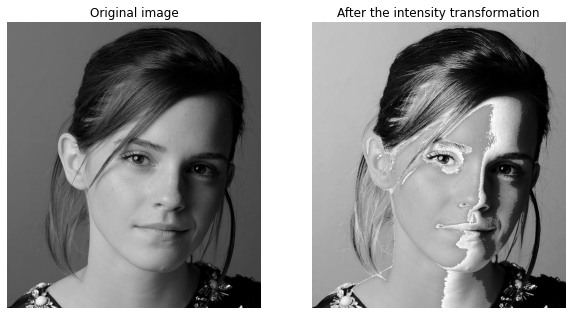

In [11]:
#read the image
original = cv.imread(r'emma_gray.jpg',cv.IMREAD_COLOR)
assert original is not None

#define the transformation
transf_1 = np.linspace(0,50,50)
transf_2 = np.linspace(100,255,100)
transf_3 = np.linspace(150,255,106)   

transform = np.concatenate((transf_1,transf_2,transf_3),axis = 0).astype(np.uint8)

#plot transform characteristics
fig,ax = plt.subplots()
ax.plot(transform)
ax.set_title("Intensity transformation")
ax.set_ylabel("Output intensity")
ax.set_xlabel("Input intensity")

#apply the transform
output = cv.LUT(original,transform)

#show the image using matplotlib
fig, ax = plt.subplots(1,2,figsize=(10,10))

output = cv.cvtColor(output,cv.COLOR_BGR2RGB)
ax[0].imshow(original)
ax[0].set_title("Original image") ;  ax[0].axis('off')

ax[1].imshow(output)
ax[1].set_title("After the intensity transformation") ;  ax[1].axis('off')

plt.show()


Question 02

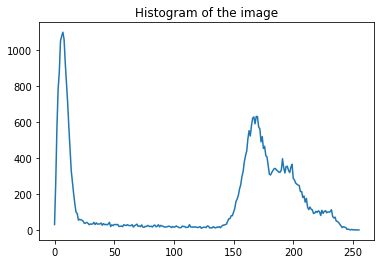

In [12]:
image = cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert image is not None

#I want to get an idea about the color gray level distribution by plotting the histogram
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
hist = cv.calcHist([image],[0],None,[256],[0,256])
plt.plot(hist)
plt.title("Histogram of the image")
plt.show()


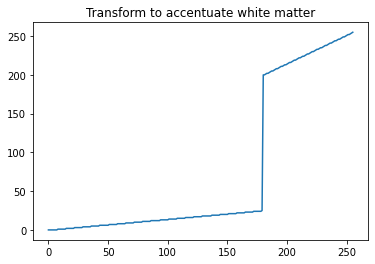

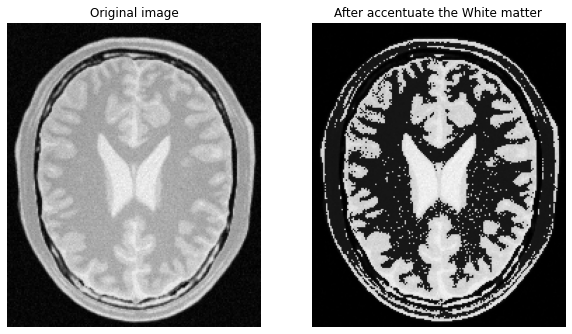

In [13]:
transf_1 = np.linspace(0,25,180)
transf_2 = np.linspace(200,255,76)
transform = np.concatenate((transf_1,transf_2),axis = 0).astype(np.uint8)
plt.plot(transform)
plt.title('Transform to accentuate white matter')
#This transform map the white matter to be close to further white while putting others down

output = cv.LUT(image,transform)

fig, ax = plt.subplots(1,2,figsize=(10,10))

output = cv.cvtColor(output,cv.COLOR_BGR2RGB)
ax[0].imshow(image)
ax[0].set_title("Original image") ;  ax[0].axis('off')

ax[1].imshow(output)
ax[1].set_title("After accentuate the White matter") ;  ax[1].axis('off')

plt.show()

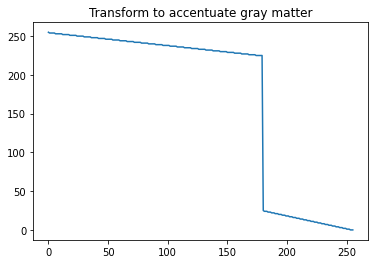

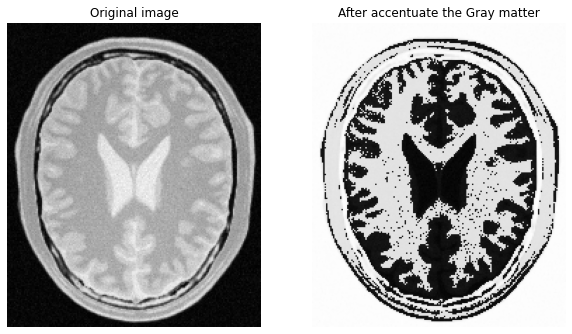

In [14]:
transf_1 = np.linspace(255,225,180)
transf_2 = np.linspace(25,0,76)
transform = np.concatenate((transf_1,transf_2),axis = 0).astype(np.uint8)
plt.plot(transform)
plt.title('Transform to accentuate gray matter')
#This transform map the gray matter to be close to white while putting others down


output = cv.LUT(image,transform)
output = cv.cvtColor(output,cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(image)
ax[0].set_title("Original image") ;  ax[0].axis('off')

ax[1].imshow(output)
ax[1].set_title("After accentuate the Gray matter") ;  ax[1].axis('off')

plt.show()

Question 03

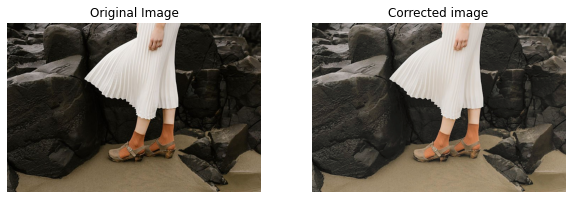

In [15]:
original_image = cv.imread("highlights_and_shadows.jpg", cv.IMREAD_COLOR)
assert original_image is not None

LAB_image = cv.cvtColor(original_image,cv.COLOR_BGR2LAB) #convert image to L*A*B space

gamma = 0.65

transform = np.array([(p/225)**gamma*225 for p in range(0,256)]).astype(np.uint8)  #gamma array

new_L = cv.LUT(LAB_image[:,:,0],transform)   #perform the transform to L plane
LAB_image[:,:,0] = new_L  #replace by new L plane
output = cv.cvtColor(LAB_image,cv.COLOR_LAB2RGB)  #convert image to RGB before show using matplotlib

fig,ax = plt.subplots(1,2,figsize =(10,10))
original_image = cv.cvtColor(original_image,cv.COLOR_BGR2RGB)

ax[0].imshow(original_image)
ax[0].set_title("Original Image") ; ax[0].axis('off')

ax[1].imshow(output)
ax[1].set_title("Corrected image") ;  ax[1].axis('off')
plt.show()


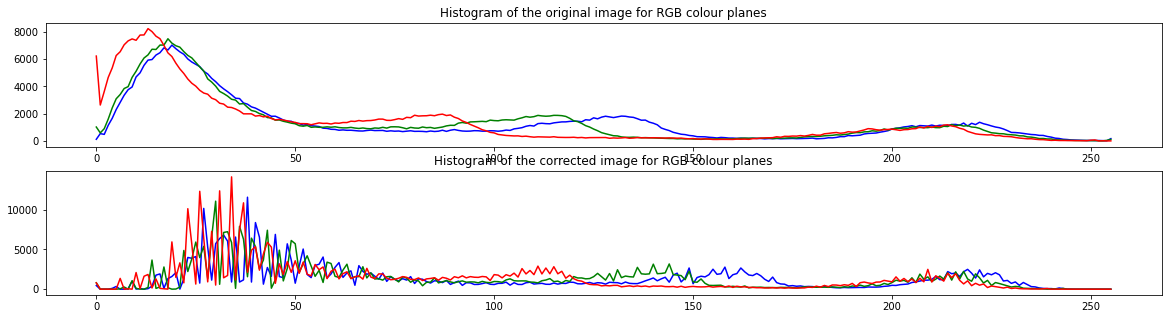

In [16]:
colours = ['b','g','r']  #represnts three colour planes
fig, ax = plt.subplots(2,1, figsize=(20,5))

for i,c in enumerate(colours):
    hist = cv.calcHist([original_image],[i],None,[256],[0,256])
    ax[0].plot(hist, color = c)
ax[0].set_title('Histogram of the original image for RGB colour planes')

for i,c in enumerate(colours):
    hist = cv.calcHist([output],[i],None,[256],[0,256])
    ax[1].plot(hist, color = c)
ax[1].set_title('Histogram of the corrected image for RGB colour planes')

plt.show()

Question 04

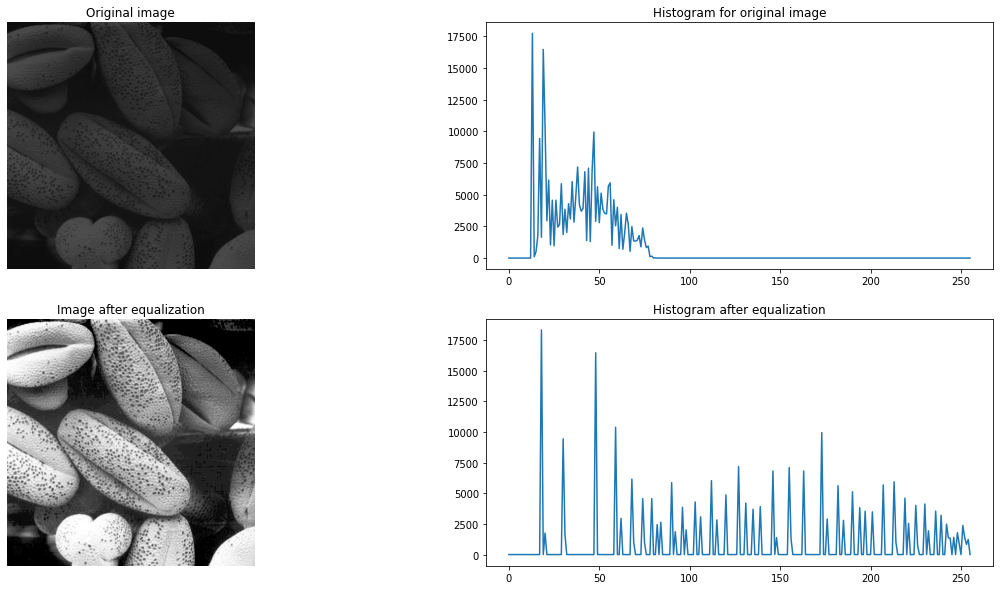

In [17]:
image = cv.imread('shells.png', cv.IMREAD_GRAYSCALE)
assert image is not None

hist = cv.calcHist([image],[0],None,[256],[0,256])

L = 256
image_height = image.shape[0]
image_width = image.shape[1]


temp = [np.sum(image == i) for i in range(0,256)]
transform = temp*(int((L-1)/(image_height*image_width)))

for i in range(1,256):
    temp[i] = temp[i-1] + temp[i]

temp = [int(j*((L-1)/(image_height*image_width))) for j in temp]

temp = np.array(temp)
output = cv.LUT(image, temp)

histogram_after = [np.sum(output == i) for i in range(0,256)]


fig, ax = plt.subplots(2,2, figsize = (20,10))

ax[0,0].imshow(cv.cvtColor(image,cv.COLOR_GRAY2RGB))
ax[0,0].set_title("Original image")
ax[0,0].axis('off')

ax[0,1].plot(hist)
ax[0,1].set_title("Histogram for original image")

ax[1,0].imshow(output, cmap = 'gray')
ax[1,0].set_title("Image after equalization")
ax[1,0].axis('off')

ax[1,1].plot(histogram_after)
ax[1,1].set_title("Histogram after equalization")

plt.show()


Question 05

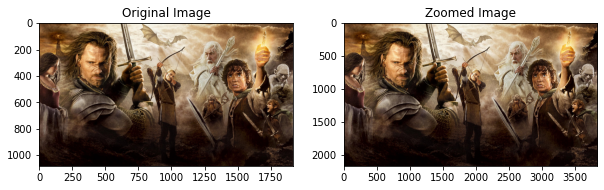

In [22]:
image = cv.imread('a1q5images/im01.png')
assert image is not None

im_h = image.shape[0]
im_w = image.shape[1]

scaling_factor = 2

scaled_h = im_h * scaling_factor
scaled_w = im_w * scaling_factor

zoomed = np.zeros((scaled_h,scaled_w,3), dtype=image.dtype)

for r in range(0,scaled_h):
     for c in range(0, scaled_w):
        try:
            zoomed[r,c] = (image[round(r/scaling_factor), round(c/scaling_factor)])
        #This is because in the last pixel, the index when devided canbe outof original image index limit
        #For an example: if the width of zoomed image is 1000 and if we divide by 2, then 500 is not in original image. Therefore then we have to take 499
        except IndexError:   
            zoomed[r,c] = (image[round(r/scaling_factor)-1, round(c/scaling_factor)-1])

fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

ax[1].imshow(cv.cvtColor(zoomed, cv.COLOR_BGR2RGB))         
ax[1].set_title("Zoomed Image")
plt.show()

[ 38.22222222  70.22222222 105.22222222]


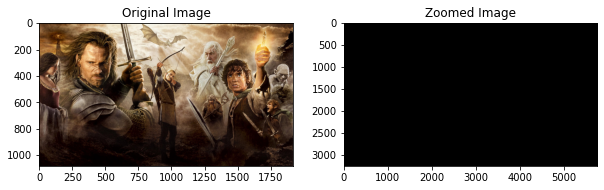

In [37]:
image = cv.imread('a1q5images/im01.png')
assert image is not None

im_h = image.shape[0]
im_w = image.shape[1]

scaling_factor = 3

scaled_h = im_h * scaling_factor
scaled_w = im_w * scaling_factor

zoomed = np.zeros((scaled_h,scaled_w,3), dtype=image.dtype)

i = 101/ scaling_factor
j = 233/ scaling_factor

i1 = int(np.floor(i))
i2 = int(np.ceil(i))

j1 = int(np.floor(j))
j2 = int(np.ceil(j))

left_side = (i-i1)*image[i2,j1] + (i2-i)*image[i1,j1]
right_side = (i-i1)*image[i2,j2] + (i2-i)*image[i1,j2]

value = (j-j1)*right_side + (j2-j)*left_side
        
fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

ax[1].imshow(cv.cvtColor(zoomed, cv.COLOR_BGR2RGB))         
ax[1].set_title("Zoomed Image")
plt.show()

Question 06

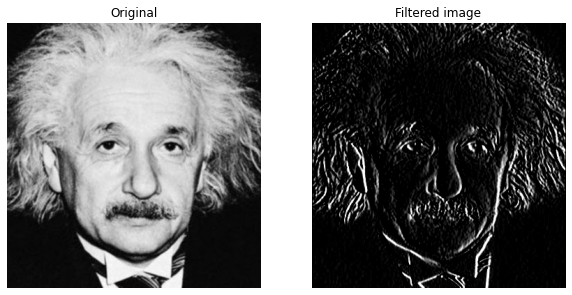

In [18]:
einstein_original = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE)  #open the original image in grayscale

sobel_filter = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], dtype = np.float32) #define the sobel filter
filtered_einstein = cv.filter2D(einstein_original, -1, sobel_filter) #apply filter2D function

fig,ax = plt.subplots(1,2, figsize = (10,10))  #show the images
ax[0].imshow(einstein_original, cmap = 'gray')
ax[0].set_title("Original") ; ax[0].axis('off')

ax[1].imshow(filtered_einstein, cmap = 'gray')
ax[1].set_title("Filtered image") ; ax[1].axis('off')  

plt.show()

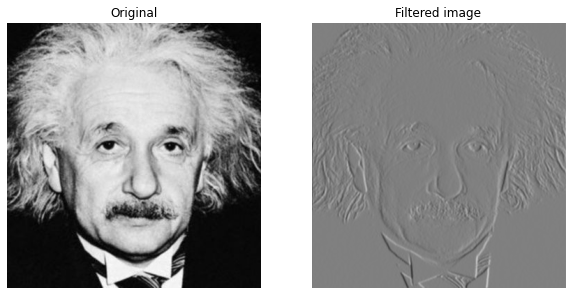

In [19]:
original_image = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE)  #open the original image in grayscale

kernal = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
kernal_size = kernal.shape[0]


num_rows = original_image.shape[0]
num_columns = original_image.shape[1]

padding_row= np.zeros((kernal_size//2,num_columns))
padding_column = np.zeros(( 2* int(np.floor(kernal_size/2)) + num_rows, kernal_size//2))


temp = np.concatenate((padding_row,original_image,padding_row),axis=0)
padded_matrix = np.concatenate((padding_column,temp,padding_column),axis=1)



filtered = np.zeros(original_image.shape)

for j in range(0,padded_matrix.shape[0]-kernal_size//2- 1):
    temp2 = padded_matrix[j:j+kernal_size,:]
    array = np.zeros((1, num_columns))

    for i in range(0, padded_matrix.shape[1]-kernal_size+1 ):
          temp3 = padded_matrix[j :j +kernal_size,i:kernal_size+i]
          array[0,i] = np.sum(np.multiply(temp3, kernal))

    filtered[j] = array


mapped = [((255*p)/(2*1275))+(255/2) for p in filtered]


fig,ax = plt.subplots(1,2, figsize = (10,10))  #show the images
ax[0].imshow(original_image, cmap = 'gray')
ax[0].set_title("Original") ; ax[0].axis('off')



ax[1].imshow(mapped, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title("Filtered image") ; ax[1].axis('off')  

plt.show()